In [ ]:
### Running in Google Colab? You'll want to uncomment and run these cell once each time you start this notebook.

"""
!wget https://raw.githubusercontent.com/psheehan/CIERA-HS-Program/master/BonusProblems/Module3/M33velocities.csv
"""

# Galaxy Rotation Curves

<img src="NGC3521-LRGB-1024c.jpg">

We've already talked quite a bit about the rotation curve of the Solar System, but that isn't the only place where rotation curves are useful! Another place where they have frequently been used is in understanding how matter is distributed in galaxies. It turns out that the equation we were previously using

\begin{equation}
v = \sqrt{\frac{G \, M}{R}}
\end{equation}

is more broadly applicable such that $M$ is the mass $enclosed$ within radius R, or:

\begin{equation}
v(R) = \sqrt{\frac{G \, M_{enclosed}(R)}{R}}.
\end{equation}

In general terms, the mass enclosed is what you get if you add up all of the mass inside of radius R. What this means, then, is that if you can measure the rotation curve of a galaxy, then you can calculate where mass is located within the galaxy. Confused? Let's explore.

In this directory, there is a file called "M33velocities.csv" with the velocities (in km/s; second column) as a function of distance from the center of the galaxy (in kilo-parsecs). Let's start by reading in the data from that file:

In [2]:
##Import statements?
import numpy as np

##Read data from file. Use delimiter = ','
data = np.genfromtxt('M33velocities.csv', delimiter=',')  ##fill in the blank
velocity = data[:,1]; radius = data[:,0]

Now, make a rotation curve plot, showing velocity as a function of radius. Make sure the axes are properly labelled!

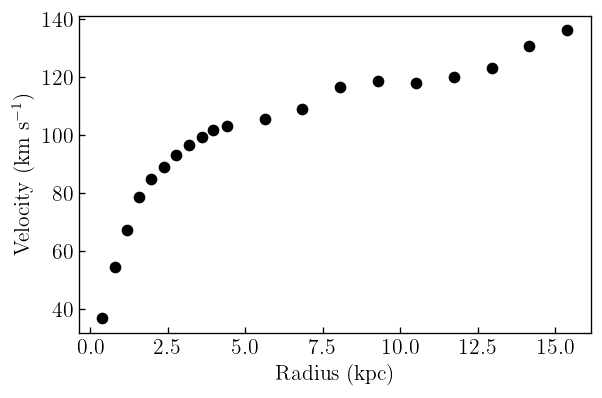

In [3]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5.5,3.5), dpi=120)

ax.plot(radius, velocity, "ko")

ax.set_xlabel("Radius (kpc)", fontsize=13)
ax.set_ylabel("Velocity (km s$^{-1}$)", fontsize=13)

ax.tick_params("both", labelsize=13)

Using numpy, calculate the mass enclosed within each radius, $R$, from the above equation and the velocity and radius data you read in above:

In [4]:
G = 6.67259e-8 # cgs
kms = 1.0e5 # cm/s
pc = 3.086e18 # cm
kpc = 1.0e3*pc # cm

M_sun = 1.99e33 # g

mass_enclosed = (velocity*kms)**2 * (radius*kpc) / G / M_sun

Next, make a plot of the mass enclosed that you just calculated as a function of radius. From images of M33, we see that stars only go out to a radius of 7 kpc - make a line on the plot that marks this point (_Hint:_ https://matplotlib.org/api/_as_gen/matplotlib.pyplot.axvline.html).

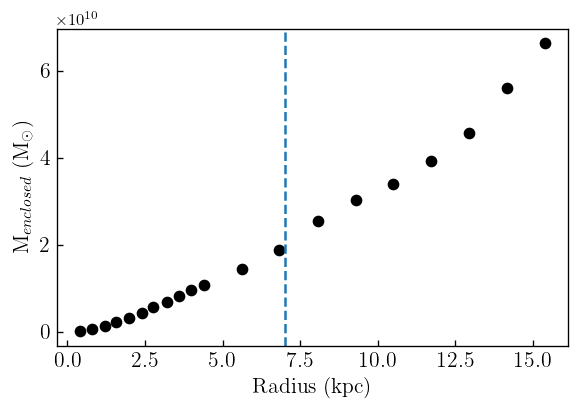

In [6]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5.5,3.5), dpi=120)

ax.plot(radius, mass_enclosed, "ko")

ax.axvline(7., linestyle="--")

ax.set_xlabel("Radius (kpc)", fontsize=13)
ax.set_ylabel("M$_{enclosed}$ (M$_{\odot}$)", fontsize=13)

ax.tick_params("both", labelsize=13)

For comparison, use the velocities and radii of planets in the Solar System to calculate the mass enclosed as a function of radius:

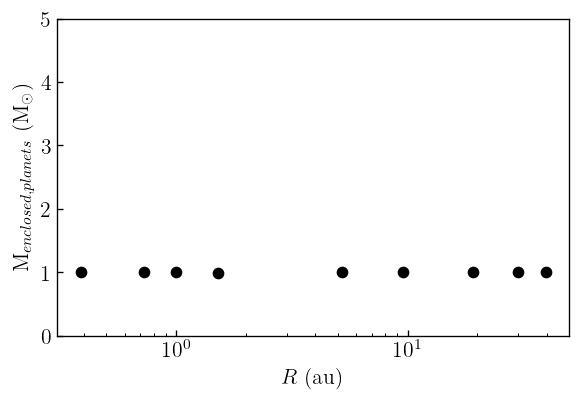

In [10]:
v_planets = np.array([47.87,35.02,29.78,24.077,13.07,9.69,6.81,5.43,4.74])
R_planets = np.array([0.3870993,0.723336,1.000003,1.52371,5.2029,9.537,19.189,30.0699,39.4821])

au = 1.496e13 # cm

M_enclosed_planets = (v_planets*kms)**2 * R_planets*au / G / M_sun

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5.5,3.5), dpi=120)

ax.plot(R_planets, M_enclosed_planets, "ko")

ax.set_xscale("log")

ax.set_ylim(0,5)

ax.set_xlabel("$R$ (au)", fontsize=13)
ax.set_ylabel("M$_{enclosed,planets}$ (M$_{\odot}$)", fontsize=13)

ax.tick_params("both", labelsize=13)

What do you notice about the behaviour of the mass of the galaxy as you go to larger and larger radii? Does the mass ever drop? Change the font color below to learn more!

<font color="white">If you've done your calculations correctly, you should see that even beyond the 15 kpc outer edge of the galaxy, the mass enclosed still continues to go up. What is that mass that we can't see? Dark matter! You've just uncovered one of the main pieces of evidence indicating that there is a significant amount of matter that we can't see, hidden within M33. The only way we can detect it is in how it exerts a gravitational force on other matter, through this rotation curve.</font>